In [1]:
# setup notebook for inline figures
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from codes.plot_utils import plot_pretty
plot_pretty()

## Physical processes shaping evolution of stars and gas in galaxies

### Andrey Kravtsov

#### The University of Chicago 

#### email: kravtsov@uchicago.edu

### Lecture 3. Physical processes driving evolution of galaxies: 

#### Simple model of galaxy formation. Gas cooling and heating.

*Heating of gas by the cosmic UV/X-ry background radiation* and its effect on gas accretion onto small-mass halos.   
Cooling time of gas in halos. Cold filamentary flows and gas shocks accompanying galaxy formation. Two mass regimes: with and without hot gaseous halos. 

<center>
<img width="800" align="center" src="img/cold_flows_k03.png"></img>
</center>


### Mass accretion history of halos in $\Lambda$ simulations

Can be understood using a simple model that predicts when shells of initial density profile of a typical peak in the Gaussian $\delta$ field collapse. Left and right panels simply show the plot with log and linear scale of $t$. The right panel shows that $M(t)$ has two regime: fast $M$ growth at small $t$ and relatively slow $M$ at late time. 

<center>
<img width="1300" align="center" src="img/mah_dexpro_ec_slope.png"></img>
</center>


### From total mass accretion rate to a simple galaxy formation model 

Starting with approximation to simulation results for the total mass accretion rate, $\dot{M}$, as a function of object mass and time $t$ either taken directly from simulation or parametrized by an analytical model (e.g., such as those discussed in <a href="l01_peak_profile_MAH.ipynb">lecture 1</a> and the first practical exercise in <a href="ex01.ipynb">ex01</a> notebook).  

### Accretion rate of baryons

Let's assume that this total mass accretes onto galaxy as a mix of dark matter and diffuse baryon plasma (gas), with a mass fraction of baryons, $f_{\rm b,acc}$, so that baryon mass accretion rate is: 

$$\dot{M}_{\rm b,acc}= f_{\rm b,acc}\,\dot{M}=f_{\rm b,uni}\,f_{\rm b,in}\dot{M},
$$

where $f_{\rm b,uni}=\Omega_{\rm b}/\Omega_{\rm m}$ is "universal" baryon fraction (i.e., average over universe), which reflects the fact that overall baryons constitute a fraction of mass smaller or equal to this fraction. 

The factor $f_{\rm b,in}$ parametrizes possible enhancement or suppression of baryon accretion due to some physical process. 

### A simple "barebones" galaxy formation model

Assume that **1)** baryons are accreted with universal baryon fraction $f_{\rm b,uni}=\Omega_{\rm b}/\Omega_{\rm m}$ (i.e., $f_{\rm b,in}=1$) in the form of gas and **2)** after accretion this gas is delivered instantly to the interstellar medium 

$$
\begin{cases}
\dot{M}_{\rm g, ISM}= f_{\rm b,uni}\,f_{\rm b,in}\dot{M} - (1-\mathcal{R})\,\dot{M}_\star,\\
\dot{M}_\star =\frac{M_{\rm g, iSM}}{\tau_{\rm sf}} , \\
\end{cases}$$

where $\tau_{\rm sf}$ is *gas depletion time scale* on which ISM gas is converted into stars; in this simple model we will simply assume that $\tau_{\rm sf}=\rm const$. 

$\mathcal{R}$ is the fraction of newly formed stars that is returned back into the ISM via winds and supernovae explosions (we are assuming that this occurs instantly, using so-called *"instantaneous recycling approxination"*). The value of $\mathcal{R}$ depends on the initial mass function (IMF) of stars; we will assume a constant value characteristic of typical observed IMF: $\mathcal{R}=0.46$.

These equations can be numerically integrated as a system of ODEs. Such integration is implemented in <a href="codes/galaxy_model.py"><tt>codes/galaxy_model.py</tt></a> in python class <tt>simplest_model</tt>. 

In [2]:
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
wmap_bolshoi_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.0469, 'sigma8': 0.82, 'ns': 0.95}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('wmap_bolshoi_cosmo', wmap_bolshoi_cosmo)
cosmo.interpolation = True


In [3]:
# define grid of redshifts at which to compute evolution model values
zmax=20.; zmin=0.; nzb = 100
zg = np.linspace(zmax, zmin, nzb) # grid of redshifts
t_output = cosmo.age(zg) # and corresponding times

In [4]:
plot_pretty(dpi=200)

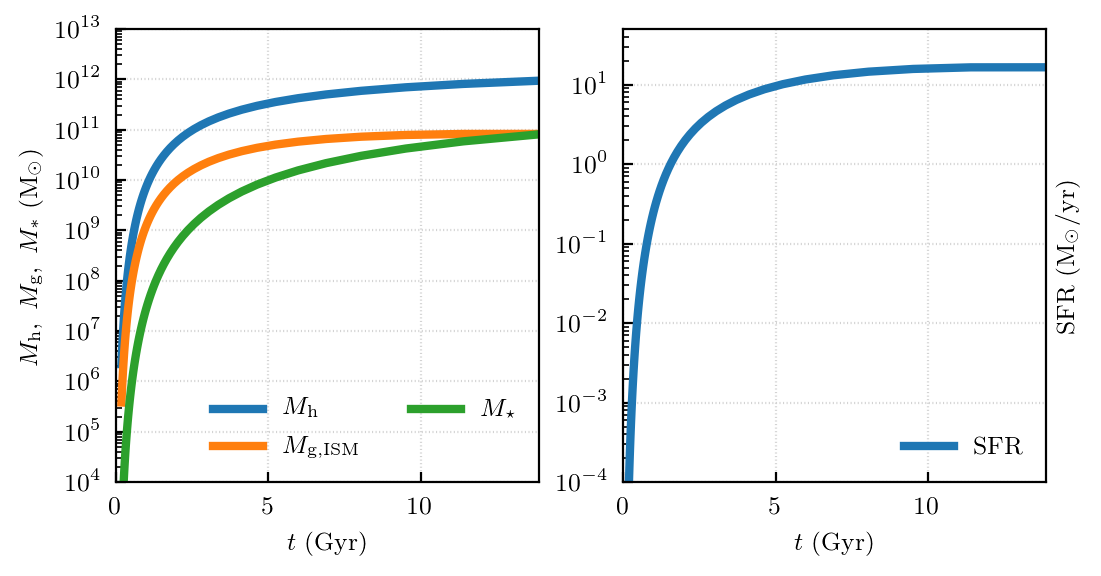

In [5]:
import codes.galaxy_model as gm

# initial halo mass at initial redshift (zmax)
Minit = 2.2e6

# set up dictionary of parameters to pass to the model
# star formation model gaslinear is simply SFR=Mgas(t)/tau, where [tau]=[Gyrs] is constant 
# tausf is gas consumption time scale in Gyrs
kwargs = { 'cosmo': cosmo, 'sfrmodel': 'gaslinear', 'tausf': 5}

t_output, Mout = gm.simplest_model.test_galaxy_evolution(gmodel=gm.simplest_model, Minit=Minit, t_output=t_output,  
                                                                 kwargs=kwargs)
gm.simplest_model.plot_test_evolution(Mout, gmodel=gm.simplest_model, t_output=t_output, 
                                      kwargs=kwargs, savefig=None)


In [6]:
def fB13(x, alfa, delta, gamma):
    m10x = np.minimum(10.**(-x), 100.)
    dummy = -np.log10(10.**(alfa*x)+1.) + delta*(np.log10(np.exp(x)+1.))**gamma/(1.+np.exp(m10x))
    return dummy

def MsMh_B13form(lMvir, lM1, leps, alfa, delta, gamma):
    lMsB13 = leps + lM1 + fB13(lMvir-lM1,alfa, delta, gamma) - fB13(0., alfa, delta, gamma)
    return lMsB13

In [7]:
s = 0. # assume AM with no scatter
lM1 = 11.39; leps = -1.685; alfa = -2.2; delta = 4.335; gamma = 0.531

# alfa dependence on scatter from G-K17
alfa = -(0.14*s**2 + 0.14*s - alfa)

plot_pretty(dpi=200)

def plot_mhms(lMmin, lMmax, nMb, cosmo, lMhi, lMsi, plot_am=False, savefig=None):

    lMh = np.linspace(lMmin, lMmax, nMb)

    Mh  = np.power(10, lMh)

    fig = plt.figure(figsize=(3.5, 3.5))
    plt.xlabel(r'$M_h\ \rm (M_\odot)$')
    plt.ylabel(r'$M_{\star}\ \rm (M_\odot)$')
    plt.xlim(1.e7,1.e15); plt.ylim(1.e3,1.e13)
    plt.xscale('log'); plt.yscale('log')

    lMhlin = np.linspace(6., 16, 100); Mhlin = 10.**lMhlin
    Mslin = Mhlin * cosmo.Ob0/cosmo.Om0
    plt.plot(Mhlin, Mslin, ':', c='gray', lw=1.5, label=r'$\Omega_{\rm b}/\Omega_{\rm m}\, M_{\rm h}$')

    z_plot = np.array([0., 2.2, 3.5, 6.0])
    # colors a la Feldmann for easier comparison
    zcolors = ['green', 'red', 'blue', 'darkgray']
    for i, zplot in enumerate(z_plot):
        Mhz = 10.**lMhi(np.log10(1.0+zplot),lMh)
        Msz = 10.**lMsi(np.log10(1.0+zplot),lMh)
        plt.plot(Mhz, Msz, c=zcolors[i], lw=2.5, label=r'$z=%1.1f$'%zplot)

    if plot_am: 
        lmhs = np.linspace(7., 15., 100)
        lmsmh = MsMh_B13form(lmhs, lM1, leps, alfa, delta, gamma)
        plt.plot(10.**lmhs, 10.**lmsmh, c='darkorange', lw=2.5, label=r'$z=0\ \rm AM$')

    plt.legend(frameon=False,loc='lower right', fontsize=7)
    plt.grid(linestyle='dotted', c='lightgray')
    if savefig is not None:
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()


evolving mass grid...
done.


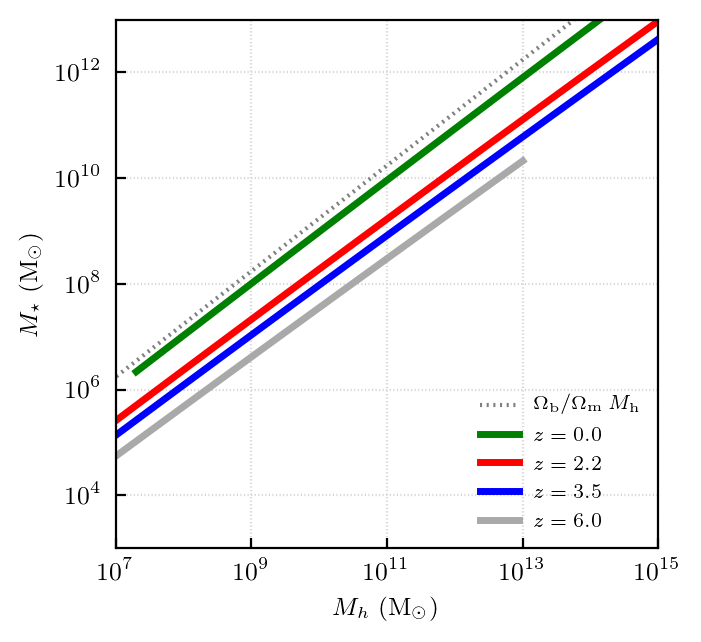

In [8]:
lMmin = 4.5; lMmax = 7.5; Nmb = 100

lMh = np.linspace(lMmin, lMmax, Nmb)

kwargs = { 'cosmo': cosmo, 'sfrmodel': 'gaslinear', 'tausf': 5}

lMhi, lMgi, lMsi = gm.simplest_model.compute_mass_grid(gmodel = gm.simplest_model, lMhig=lMh, t_output=t_output, 
                                                   kwargs=kwargs)
plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi)

Thus, this simple model predicts a linear $M_\star-M_{\rm h}$ relation, $M_\star\propto M_{\rm halo}$, at all epochs. This indicates that galaxy properties retain most of the self-similarity of purely gravitational collapse from the initial $\Lambda$CDM $\delta$ field. Self-similarity is only broken in time, but not in mass. 

### However, this is grossly inconsistent with the relation indicated by observations 

(e.g., very different shapes of galaxy stellar mass function and predicted halo mass function). 

Real galaxies cannot have such linear relation. Otherwise, shape and evolution of stellar mass function and halo mass function would be very similar. But this is not the case. Compare the shape and evolution of stellar mass function of galaxies (left) and mass function of collapsed halos (right). They have very different shapes and the mapping between them cannot be linear.

<center>
<img width="1100" align="center" src="img/smf_hmf_evo.png"></img>
</center>

$M_\star-M_{\rm halo}$ relation obtained from matching stellar mass and halo mass functions along with observational constraints (<a href="http://adsabs.harvard.edu/abs/2018AstL...44....8K">Kravtsov et al. 2018</a>)

<br>
<center>
<img width="800" align="center" src="img/msmh_am_data_k18.PNG"></img>
</center>


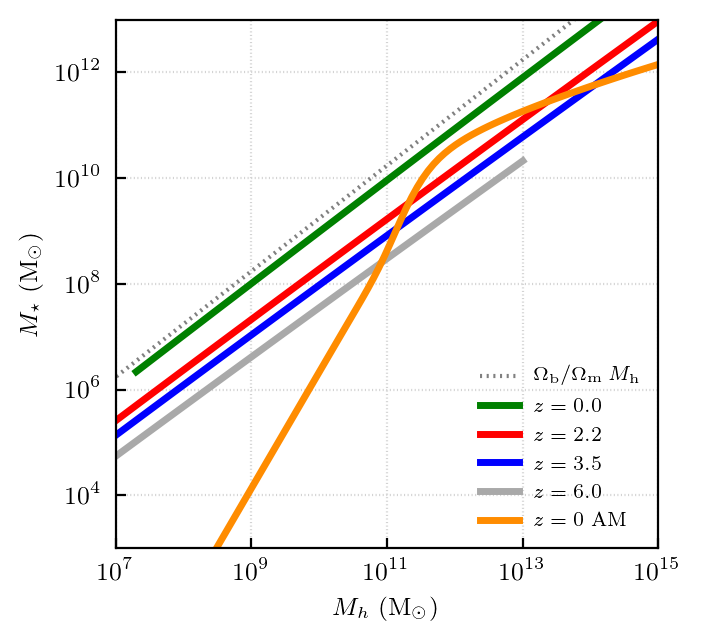

In [9]:
plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi, plot_am=True)

### We have to examine explicit assumptions that we made in the simplest model

* Gas is accreted with the universal baryon fraction of the total accreted mass.

* All accreted gas instantly joins interstellar medium.

* Star formation occurs on a ***constant*** time scale of order $\sim\rm Gyr$.

### Heating processes 

* Heating due to excess photon energy during ionization by incident radiation 

* Adiabatic heating during gas compression 

* Heating in hydro shocks

* Heating by cosmic rays (effects of cosmic rays is a research frontier and is not yet understood)

### Example of a process that can suppress gas accretion: UV/X-ray heating after reionization 

At $z_{\rm rec}\approx 1100$ the electrons and ions recombined, which allowed photons we know detect as the Cosmic Microwave Background (CMB) to propagate freely. 

Observations show, however, that by $z\approx 6$ intergalactic medium in the universe is ionized. So between $z=1100$ and $z\approx 6$ the gas must have been *re-ionized*. The process is called *reionization* and is almost certainly due to the UV photons emitted by young massive stars in the first galaxies at these high redshifts, with some minor contribution from quasars. 

### Re-ionization of the universe and heating of the intergalactic gas

The UV photons ionize neutral atoms and freed electrons carry extra energy which gets converted into gas temperature. Ionization by photons with spectrum typical of that of massive stars heats the gas to $T\approx 10000-20000 K$. This heating breaks self-similarity because it *introduces a mass scale* corresponding roughly to the *Jeans mass* of the integalactic gas and leads to suppression of gas accretion onto halos with mass smaller than the Jeans mass.

Visualization of 3D density of neutral hydrogen, in a volume few Mpc across, during early stages of galaxy evolution in $\Lambda$CDM simulation (<a href="http://home.fnal.gov/~gnedin/GALLERY/rei_p.html">visualization</a> by N. Gnedin, Fermilab/U.Chicago). From left to right, $z=12, 9, 7, 6$.


<table>
 <tr>
    <td><img width="500" align="center" src="img/rei_z12.png"></img></td>
    <td><img width="500" align="center" src="img/rei_z9.png"></img></td>
    <td><img width="500" align="center" src="img/rei_z7.png"></img></td>
    <td><img width="500" align="center" src="img/rei_z6.png"></img></td>
  </tr>

</table>


### The Jeans mass

This results in a characteristic halo mass scale below which gas accretion is suppressed that evolves with redshift. 

We can numerically write Jeans length for ideal ionized gas as the time scale over which the sound-crossing time and free-fall time are equal $\lambda_J/c_s\approx t_{\rm ff}$ or $\lambda_J\approx c_s\,t_{\rm ff}$

$$\lambda_J=c_s\sqrt{\frac{3\pi}{32G\rho}}=\sqrt{\gamma\,\frac{n_{\rm g}kT}{n_{\rm g}\mu m_{\rm p}}}\,\sqrt{\frac{3\pi}{32G\rho}}$$

where the last part assumes ideal ionized gas. Jeans mass can be defined as: 

$$M_J = \frac{4\pi}{3}\rho\,\left(\frac{\lambda_J}{2}\right)^3.$$



### The Jeans mass

For ionized gas $\mu\approx 0.6$, $\gamma=5/3$. Assuming that $\rho$ is the mean density of matter at redshift $z$: $\rho=(1+\delta)\,\Omega_{\rm m0}\rho_{\rm crit0}(1+z)^3$

$$M_J\approx 2.76\times 10^{8}\,M_\odot\,\left(1+\delta\right)^{-1/2}\,\left(\frac{1+z}{7}\right)^{-3/2}\,\left(\frac{\Omega_{\rm m0}}{0.3}\right)^{-1/2}\left(\frac{h}{0.7}\right)^{-1/2}\,\left(\frac{T}{10^4\ \rm K}\right)^{3/2} $$

The Jeans mass grows with time and for the same parameters at $z=0$ will be $7^{3/2}$ larger: $M_J\approx 5.11\times 10^9\, M_\odot$.


### Implementing suppression of gas accretion for $M(t)<M_{\rm jeans}(t)$

Inherit my <tt>simplest_model</tt> model class into a new class (e.g., <tt>model_jeans_mass</tt>) and modify routine <tt>fg_in</tt>, which modulates accretion rate of baryon gas relative to the total mass accretion rate of matter, with a code that cuts off accretion of gas in objects that at $z\leq 6$ have mass smaller than the Jeans mass estimate above for $\delta=0$. 

In [10]:
class model_jeans_mass(gm.simplest_model):
    def __init__(self, *args, **kwargs):

        self.z_rei = kwargs['z_rei']
        super(model_jeans_mass, self).__init__(*args, **kwargs)
        return
       
    def Mjeans(self, z):
        return 2.76e8/((1.+z)/7)**1.5 # Jeans mass at mean density for T=1e4 K and delta=0
    
    def fg_in(self,t):
        """
        implementing suppression of baryon accretion below Jeans mass
        """
        zd = self.cosmo.age(t, inverse=True)
        dummy = np.ones_like(zd)
        if zd<=self.z_rei and self.Mh <= self.Mjeans(zd):
            dummy = 0.0

        return dummy


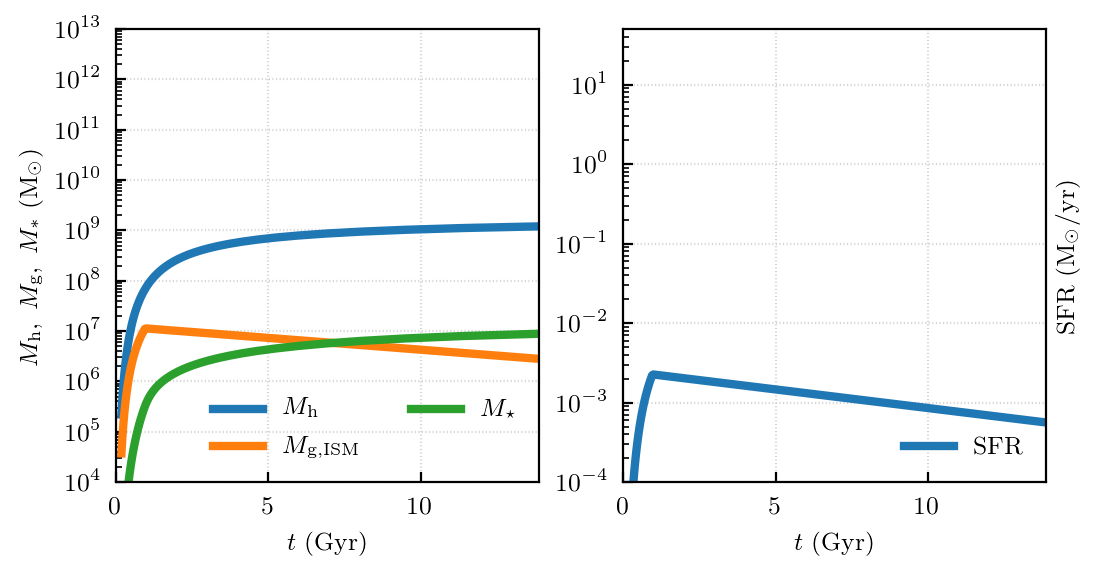

In [20]:
Minit = 2.2e5

kwargs = { 'cosmo': cosmo, 'sfrmodel': 'gaslinear', 'tausf': 5, 'z_rei': 6.}

t_output, Mout = gm.simplest_model.test_galaxy_evolution(gmodel=model_jeans_mass, Minit=Minit, t_output=t_output,  
                                                                 kwargs=kwargs)
gm.simplest_model.plot_test_evolution(Mout, gmodel=gm.simplest_model, t_output=t_output, 
                                      kwargs=kwargs, savefig=None)


evolving mass grid...
done.


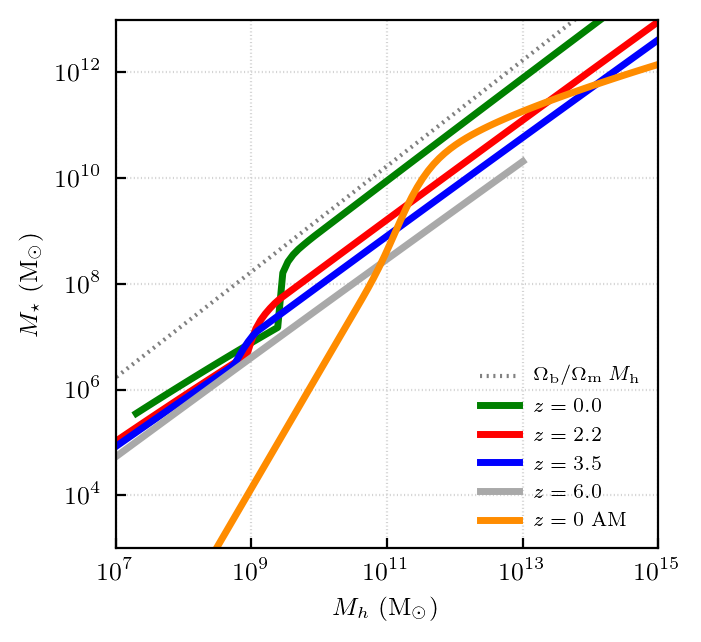

In [21]:
lMhi, lMgi, lMsi = gm.simplest_model.compute_mass_grid(gmodel = model_jeans_mass, lMhig=lMh, t_output=t_output, 
                                                   kwargs=kwargs)
plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi, plot_am=True)

### Suppression of gas accretion on small-mass halos and "filtering mass" 

The mathematical formalism describing effect of such re-heating on the evolution of perturbations is presented in <a href="http://adsabs.harvard.edu/abs/2000ApJ...542..535G">Gnedin (2000).</a> The quantitative effect on accretion of baryons on a collapsing peak is calibrated using
 numerical simulations of galaxy formation  (e.g., <a href="http://adsabs.harvard.edu/abs/2006MNRAS.371..401H">Hoeft et al 2006</a>, <a href="http://adsabs.harvard.edu/abs/2008MNRAS.390..920O">Okamoto et al 2008</a>). It predicts that baryon fractions in halos of mass $M$ at redshift $z$ is modified from a constant value $\bar{f}_{\rm b, uni}$ as:

$$
 f_{\rm b}(M,z)=\bar{f}_{\rm b, uni}\left\{1+(2^{\alpha/3-1}-1)\left[\frac{M}{M_{\rm c}(z)}\right]^{-\alpha}\right\}^{-3/\alpha},
$$
 
with $\alpha=2$. 

Baryon fraction in halos of different mass before and after reionization ($z_{\rm rei}\approx 6$; <a href="http://adsabs.harvard.edu/abs/2008MNRAS.390..920O">Okamoto et al 2008</a>). The yellow lines show parameterization from the previous slide. 

<center>
<img width="900" align="center" src="img/fb_uv_okamoto09.png"></img>
</center>

### Characteristic mass $M_c(z)$

below which baryon accretion is suppressed due to UV heating of the intergalactic medium (IGM): 

<center>
<img width="700" align="center" src="img/mc_okamoto_etal09.png"></img>
</center>

### Approximate formula for $M_c(z)$

The cutoff mass $M_{\rm c}$ is derived from simulations of galaxy formation.
For example, $M_{\rm c}(z)$, in figures of <a href="http://adsabs.harvard.edu/abs/2008MNRAS.390..920O">Okamoto et al (2008)</a>
is well approximated by the following formula (assuming h=0.7):

$$
    M_{\rm c}(z) = 8.6\times 10^9\ M_\odot\,\exp(-0.63z),\ \ \mathrm{for}\ z<9,
$$

while $M_{\rm c}$ can be assumed to be $\approx 10^5-10^6h^{-1}\ M_\odot$ at $z>9$, because temperature of the gas is much smaller before reionization and formation of galaxies in halos below this mass can be suppressed by the difficulty of molecular hydrogen formation and Lyman-Werner background and other processes.

At $z\approx 6$ this equation predicts $M_{\rm c}(z=6)\approx 2\times 10^8\, M_\odot$. 


Compare this to the simple estimate using Jeans mass at $\delta=0$ and $T=10^4$ K: $M_J\approx 5\times 10^9\ M_\odot$ at $z=0$ and $3\times 10^8\ M_\odot$ at $z=6$. They are pretty close!

### Including this effect in the simple galaxy formation model 

of gas accretion due to UV heating after reionization (shown yesterday). 

Suppression of gas accretion is implemented using this formula can be implmented in the variant of the galaxy formation model via $f_{\rm b,in}$ factor. Let's call this model <tt>model_with_uvheating</tt> using approximation to $M_c(z)$ given above and using this factor to modulate baryon mass accretion rate (with $\alpha=2$):

$$
 f_{\rm b, in}(M,z)=\left\{1+(2^{\alpha/3-1}-1)\left[\frac{M}{M_{\rm c}(z)}\right]^{-\alpha}\right\}^{-3/\alpha},
$$

$$\dot{M}_{\rm b,acc}= f_{\rm b,acc}\,\dot{M}=f_{\rm b,uni}\,f_{\rm b,in}\dot{M},
$$

I leave implementation of such model as an exercise to you. Use example of Jeans mass based suppression above as a guiding example of how to do this. 

evolving mass grid...
done.


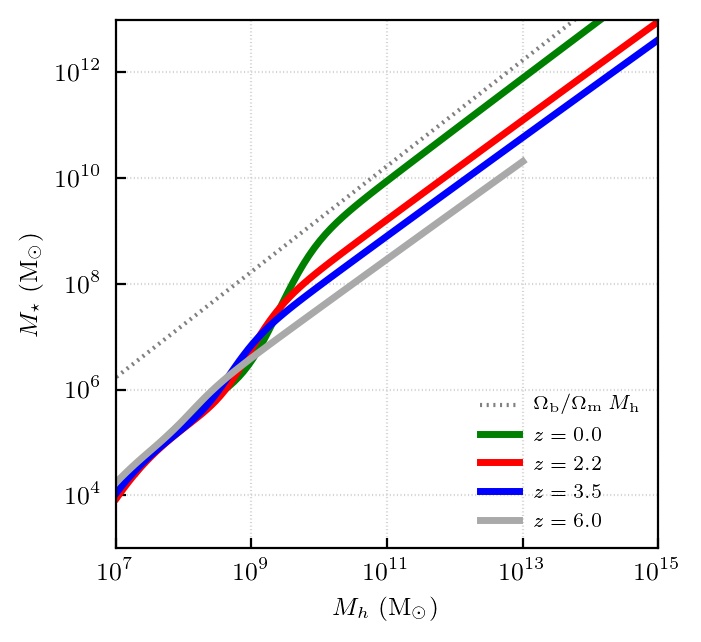

In [23]:
# This is example of running a model where such model was done. The implementation is omitted
# to give you a chance to implement it on your own. My implementation will be included in the update of this notebook
# on Friday

lMhi, lMgi, lMsi = gm.simplest_model.compute_mass_grid(gmodel = model_with_uvheating, lMhig=lMh, t_output=t_output, 
                                                   kwargs=kwargs)
plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi)

### We have to examine explicit assumptions that we made in the simplest model

* Gas is accreted with the universal baryon fraction of the total accreted mass (not true at small masses due to UV/X-ray heating of IGM during and after reionization). 

* All accreted gas instantly joins interstellar medium. This may not be true, if gas is heated during collapse by compression and shocks and cannot radiate this energy fast enough. 

* Star formation occurs on a ***constant*** time scale of order $\sim\rm Gyr$.

### Cooling processes

Unlike dark matter, baryons can radiate away the internal energy they acquire during gravitational collapse thanks to many cooling processes:

* <b>Free-free emission (aka brehmsstrahlung)</b>  produced by charged particles moving in the EM field of other changed particles - e.g., electron moving past a proton.

* <b>bound-bound emission</b>: electron transitions from level to level in atoms and ions. As atoms or ions (with bound electrons present) absorb photons or bump into each other, electron(s) can get excited to higher energy levels. Subsequent decay back to ground state and emission of photon(s). If plasma has low optical depth to emitted photons, they will leave the system, carrying the energy with them.

* <b>free-bound emission</b> when an electron recombines with an ion. 

* <b>Compton cooling</b>, in which the electrons scatter off the CMB photons which have low energy due to redshifting at the redshifts relevant for galaxies.
Free electrons must exist - i.e., gas must be at least partially ionized - for the Compton cooling to operate.


### Cooling functions

Combined cooling rate due to various processes of gas of a given metallicity illuminated by a certain radiation field are tabulated via the *cooling function* $\Lambda$:

$$\Lambda(T,Z,...)= \frac{\mathcal{L}}{n^2},$$

where $\mathcal{L}$ is the cooling rate in, say, ergs per second. The scaling with $n^2$ because most cooling processes are due to collisions of baryon particles and thus depend on $n^2$. 

### Cooling processes in the primordial (zero metallicity) gas

This is Figure 1 from <a href="http://adsabs.harvard.edu/abs/1997ApJ...477....8W">Weinberg et al. (1997)</a>:

<center>
<img src="img/weinberg_etal97_cool_func_fig1.png" width="700"></img>
</center>


### Cooling processes in gas enriched with heavy elements (Z>0)

As gas gets enriched with heavy elements, the number of different ions present and possible processes of their mutual interactions becomes large. Here is a figure from <a href="http://adsabs.harvard.edu/abs/2009MNRAS.393...99W">Wiersma et al. (2008)</a> (see also $\Lambda$ and $H$ tables and movies <a href="http://www.strw.leidenuniv.nl/WSS08">here</a>)

<center>
<img src="img/wiersma08_Lambda_Z_dependence.png" width="800"></img>
</center>

### Cooling and heating function tables

It is possible to follow reaction rate for dozens, or even hundreds, of atoms and ions and to track their abundance in a model (e.g., <a href="http://adsabs.harvard.edu/abs/2014MNRAS.442.2780R">Richings et al. 2014</a>), but this is most often is not necessary because gas is often in the collisional and ionization equilibrium. Thus, such equilibrium can be assumed and the rates can be pre-computed into interpolation table as a function of metallicity, UV background intensity, and gas density,  using a plasma emission code, such as <a href="http://www.nublado.org/">Cloudy</a>.

Given that cooling rates depend trivially on $n^2$, the actual tabulated quantity is so-called *cooling function*: $\Lambda(T,Z,...)\equiv \mathcal{L}/n^2$. 

### Cooling/heating time

*The cooling (heating) time* is a characteristic time scale over which plasma loses (gains) its internal energy: $\dot{e}=e/t_{\rm cool}$, where $\dot{e}=n^2(H-L)$ is the net rate of heating/cooling. 
The cooling time also depends on the physical gas density: $n(r)=\rho_{\rm gas}(r)/(\mu m_p)=f_{\rm gas}\rho_{\rm tot}/(\mu m_p)$, where the mean molecular weight for ionized plasma is $\mu\approx 0.6$ and $m_p=1.67262\times 10^{-24}\ \rm g$ is the mass of proton: 

$$
t_{\rm cool}=\frac{e}{\dot{e}}=\frac{nkT}{(\gamma-1)n^2\vert H-\Lambda\vert},
$$

where $\gamma$ is adiabatic index ($\gamma=5/3$ for ionized plasma or atomic gas).

### Heating and cooling of gas during collapse

When gas accretes onto halos it has $T$ of a few thousand K (set by the cosmic UV background) which corresponds to sound speed: $c_s=\sqrt{\gamma kT/(\mu m_p)}$ of a few km/s. However, it will achieve infall velocity of order halo circular velocity - i.e., $\sim 200$ km/s for the Milky Way halo during collapse. Its motion, thus, will be highly supersonic. Supersonic flows generally quickly develop *shocks*. 

Shocks are discontinuities in flow properties - jumps of density, velocity, temperature, entropy - convert gas kinetic energy into internal energy via viscosity. 

Whether gas is able to retain the internal energy it acquires in this process depends on how quickly it can cool.

### Supersonic accretion  flows onto galaxy, heating by compression and shocks

Temperature map and velocity field of gas around a galaxy at $z=4$ forming in a $\Lambda$CDM model. The near free-fall of gas along filaments in the "cold flow" is a physical motivation for assuming that all gas upon accretion immediately falls onto ISM of the galaxy in the halo center. 

<center>
<img width="800" align="center" src="img/cold_flows_k03.png"></img>
</center>


Such "cold flows" are ubiquitous in galaxy formation simulations. A simulation with AREPO code (Nelson et al. 2015). 

<center>
<img width="1500" align="center" src="img/cold_flows_nelson15.png"></img>
</center>


### Cooling time as a function of halo mass

Let's assume that gas gets shocked at the virial radius corresponding to density contrast of $\Delta\approx 200$ and reaches "virial" temperature of $T_\Delta= \mu m_p/k \times GM_\Delta/R_\Delta$. We can compute the cooling time of gas for such density and temperature:

$$
t_{\rm cool}=\frac{e}{\dot{e}}=\frac{nkT}{(\gamma-1)n^2\vert H-\Lambda\vert}=\frac{\mu m_p}{(\gamma-1)n_{\Delta}\vert H-\Lambda\vert}\frac{GM_\Delta}{R_\Delta},
$$

where $n_{\rm \Delta}=\Omega_{b0}\rho_{\rm cr,0}(1+z)^3\,{\Delta}/(\mu m_p)$ where $\mu$ is the mean particle weight per proton mass $m_p$: $\mu\approx 0.6$ for fully ionized plasma. 

### Cooling time as a function of halo mass: two regimes of fast and slow cooling

Here is a result of such calculation where I used definition of halo mass to be the mass enclosed within the radius within which density contrast is $\Delta=200$ relative to the mean density.

The figure shows that the cooling time is much smaller than the age of the universe for small mass halos, but becomes longer than the age of the universe for $M\geq 2-3\times 10^{12}\ M_\odot$. Thus, the gas that accretes on such massive halos and gets shocked to the virial temperature cannot cool fast enough. This is part of the explanation of why we observe hot, X-ray emitting gas in groups and clusters of galaxies. 


<center>
<img src="img/tcool_M200.png" align="center" width="700"></img>
</center>

### In halos of mass $M<10^{12}\, M_\odot$ most gas mass accretes almost on a free-fall time scale onto galaxy at the center 

Temperature map and velocity field of gas around a galaxy at $z=4$ forming in a $\Lambda$CDM model. The near free-fall of gas along filaments in the "cold flow" is a physical motivation for assuming that all gas upon accretion immediately falls onto ISM of the galaxy in the halo center. 

<center>
<img width="800" align="center" src="img/cold_flows_k03.png"></img>
</center>


Such "cold flows" are ubiquitous in galaxy formation simulations (cf. Katz et al. 2003; Keres et al. 2005
Dekel & Birnboim 2006; Ockvirk et al. 2008)

Example: a simulation with AREPO code (Nelson et al. 2015). 

<center>
<img width="1500" align="center" src="img/cold_flows_nelson15.png"></img>
</center>


### Filamentary "cold" flows become increasingly complex with increasing halo mass and break up into shreds in massive halos with dense hot gaseous halo

Gas density at $z=3$ in simulations of halos of different $z=0$ mass (from left to right: $10^{11}$, $10^{12}$, $10^{13}\ M_\odot$; Rosdahl & Blaizot 2012). The stability of such gas flows and their detailed properties at high resolution are an area of active frontier research (e.g., Maldeker & Dekel 2015; van de Voort et al. 2019; Peeples et al. 2019).

<br>
<center>
<img width="1500" align="center" src="img/cold_flows_rosdahl_blaizot12.png"></img>
</center>

### In massive halos, $M>10^{12}\, M_\odot$, cooling time of low-density gas is long

So any gas that is heated while at low density can stay hot for extended periods of time forming a hot halo. 

We can try to implement suppression of gas accretion onto interstellar medium in halos more massive than the characteristic mass of $M_{\rm hot}=10^{12}\, M_\odot$ using a similar "smooth" step function as for accretion suppression due to UV/X-ray heating, but now modifying it to suppress accretion above a certain mass, not below: 

$$
 f_{\rm b, in}(M,z)=1-\left\{1+(2^{\alpha/3-1}-1)\left[\frac{M}{M_{\rm hot}}\right]^{-\alpha}\right\}^{-3/\alpha},
$$

$$\dot{M}_{\rm b,acc}= f_{\rm b,acc}\,\dot{M}=f_{\rm b,uni}\,f_{\rm b,in}\dot{M},
$$

*I leave implementation of such model as an exercise to you for today, but I will show you a result of such calculation. A possible more advanced exercise is to figure out scaling of $M_{\rm hot}$ with redshift expected in such model. *


evolving mass grid...
done.


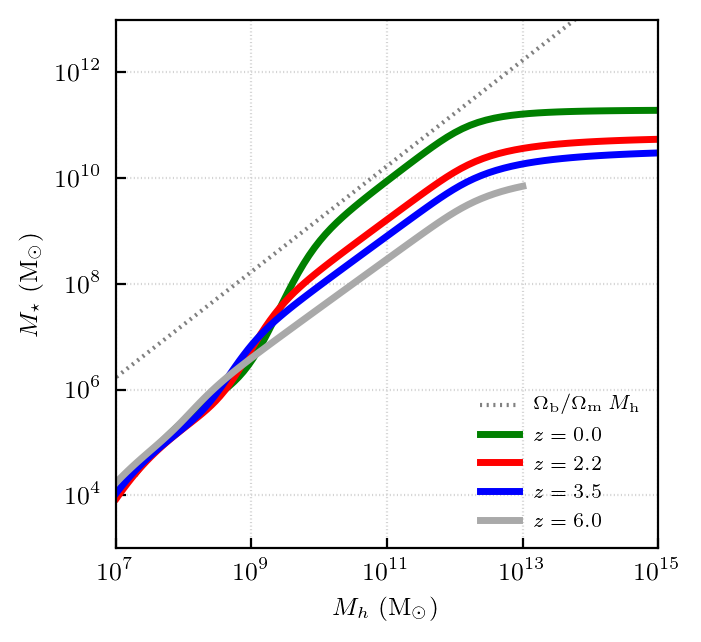

In [26]:
# This is example of running a model where such model was done. The implementation is omitted
# to give you a chance to implement it on your own. My implementation will be included in the update of this notebook
# on Friday

lMhi, lMgi, lMsi = gm.simplest_model.compute_mass_grid(gmodel = model_with_mhot, lMhig=lMh, t_output=t_output, 
                                                   kwargs=kwargs)
plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi, plot_am=False)

###  However, hydro$+N-$ body cosmological simulations of galaxy formation 

that include cooling and heating processes considered here do not show such sharp break in the $M_\star-M$ relation at large masses.

<br>
<center>
<img width="900" align="center" src="img/msmh_sims_linear.png"></img>
</center>

### Thank you for your attention!

### Codes and calculations used to produce some of the figures in this notebook.

In [17]:
def Lambda_cool(Tgas, Zmet = 0.3, init=True):
    """
    cooling function based on Gnedin & Hollon 2012 tables
    input: 
    Tgas = gas temperature in K
    Zmet = gas metallicity in units of solar metallicity
        metallicity dependence is not implemented yet. calculations done for Z = 0.2Zsun.
    output:
    Lambda(T,z) = cooling function in ergs*cm^3/s
    """
    if init:
        dummy = np.loadtxt('data/cool_table_n1e-3.dat', unpack=True) 
        lTgh = dummy[0]; heat = dummy[3]; cool = dummy[4]
        Lambda_cool.hfunc = UnivariateSpline(lTgh, np.log10(np.abs(heat)), s=0.0)
        Lambda_cool.cfunc = UnivariateSpline(lTgh, np.log10(np.abs(cool)), s=0.0)
        return 0.0
    else:
        return  Lambda_cool.hfunc(np.log10(Tgas)), Lambda_cool.cfunc(np.log10(Tgas))


In [18]:
# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo) 


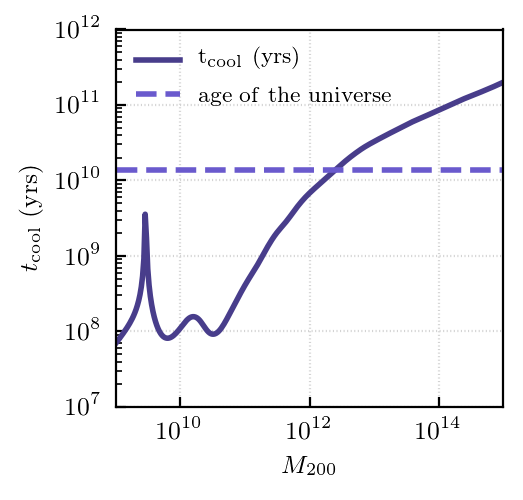

In [19]:
from colossus.cosmology import cosmology
from colossus.halo.mass_so import M_to_R
from scipy.interpolate import UnivariateSpline

delta_vir = 200.; 
Zmet = 0.2*0.02; z=0.
# some relevant constants
Msun = 1.989e33; kpc = 3.08568e+21; G = 6.67259e-08; yr = 3.15569e+07
mu = 0.6; mp = 1.67262e-24; 
kB = 1.38066e-16; keV = 1.60219e-09
mump = 0.6*mp

# We use 200c mass definition for halo profile, but compute gas density at Delta=200m wrt mean density
mdef = '200m'
lMhmin, lMhmax = 7., 15.
lm200 = np.arange(lMhmin, lMhmax, 0.02)
m200 = np.power(10.,lm200)/cosmo.h
r200 = M_to_R(m200, z, mdef)/cosmo.h
kT200 = 4.3013e4*m200/r200*mump
# colossus returns density rho_c in h^2 Msun/kpc^3
n200 = delta_vir*cosmo.Ob0/cosmo.Om0*cosmo.Om0*cosmo.rho_c(z)*cosmo.h**2*Msun/kpc**3/mump 
Lambda_cool(kT200/kB, Zmet = Zmet, init=True)

lhf, lcf = Lambda_cool(kT200/kB,Zmet=Zmet, init=False)

tcool = 3.*kT200/(5.* n200 * np.abs(10.**lhf-10.**lcf))/yr
    

plt.figure(figsize=(2.5,2.5))
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$M_{200}$'); plt.ylabel(r'$t_{\rm cool}\ \mathrm{(yrs)}$')
plt.xlim(1.e9,1e15); plt.ylim(1.e7,1.e12)

# mean matter density rho_crit(z)*Omega0 in h^2 Msun/kpc^3
dmean = 2.77e2
plt.plot(m200, tcool, c='darkslateblue', lw=2.0, label=r'$\mathrm{t_{\rm cool}\ (yrs)}$')
tU = cosmo.age(z)*np.ones_like(m200)
plt.plot(m200, tU*1e9, '--', c='slateblue', lw=2.0, label=r'$\mathrm{age\ of\ the\ universe}$')

plt.grid(linestyle='dotted', c='lightgray')
plt.legend(frameon=False, loc='upper left', fontsize=8)
#plt.savefig('img/tcool_M200.png', bbox_inches='tight')
plt.show()
